In [18]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [19]:
plt.rcParams['font.size'] = 14

In [20]:
# Load the CO2 data into a DataFrame
df = pd.read_csv(
    'https://gml.noaa.gov/aftp/data/trace_gases/co2/flask/surface/txt/co2_mid_surface-flask_1_ccgg_month.txt',
    delimiter="\s+",skiprows=54, names=['site',	'year',	'month',	'value'])

In [21]:
# Convert 'year' and 'month' to datetime format
df['date'] = pd.to_datetime(df[['year','month']].assign(day=1)).dt.to_period('M')

In [22]:
df = df.set_index('date')

In [23]:
df['months'] = [x.n for x in (df.index-df.index[0])]

In [24]:
df

,site,year,month,value,months
date,,,,,
1985-05,MID,1985,5,350.28,0
1985-06,MID,1985,6,348.82,1
1985-07,MID,1985,7,347.17,2
1985-08,MID,1985,8,344.69,3
1985-09,MID,1985,9,342.39,4
...,...,...,...,...,...
2022-08,MID,2022,8,415.60,447
2022-09,MID,2022,9,414.46,448
2022-10,MID,2022,10,416.29,449


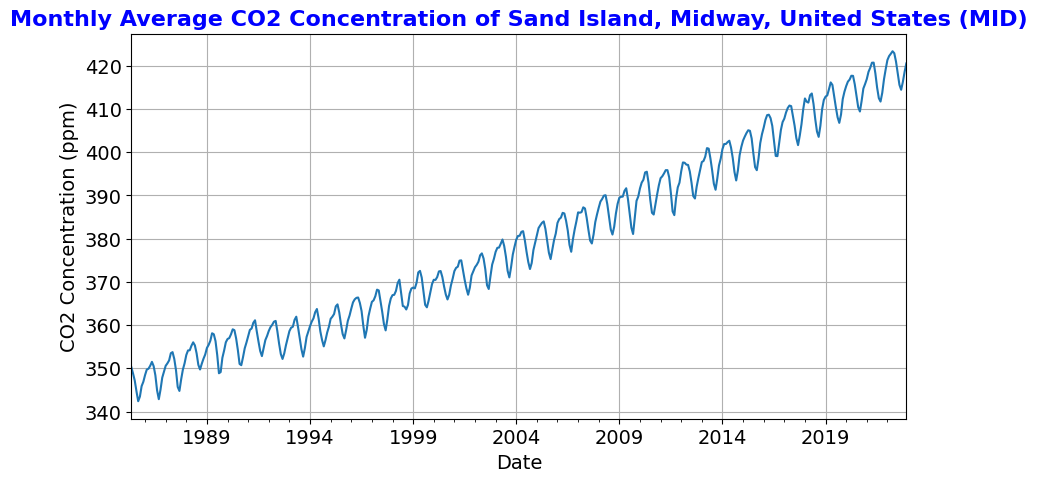

In [25]:
df['value'].plot(figsize=(10, 5), title='Monthly Average CO2 Concentration of Sand Island, Midway, United States (MID)', grid=True)
plt.xlabel('Date')
plt.ylabel('CO2 Concentration (ppm)')

# Increase the font size and make the title bold and blue
plt.title('Monthly Average CO2 Concentration of Sand Island, Midway, United States (MID)', fontsize=16, fontweight='bold', color='blue')

plt.show()

In [26]:
num_data_points = len(df)
print(f"Number of data points: {num_data_points}")

Number of data points: 452


In [27]:
def fft(x):    # use our y value from our plot/data as x here...
    N = len(x)
    if N <= 1: return x
    even = fft(x[0::2])
    odd =  fft(x[1::2])
    return np.array( [even[k] + np.exp(-2j*np.pi*k/N)*odd[k] for k in range(N//2)] + \
                     [even[k] - np.exp(-2j*np.pi*k/N)*odd[k] for k in range(N//2)] )

In [28]:
X = fft( df['value'][:256] ) #cutting data into the 2**8 amount

C:\Users\User\AppData\Local\Temp\ipykernel_9332\2659576741.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return np.array( [even[k] + np.exp(-2j*np.pi*k/N)*odd[k] for k in range(N//2)] + \
C:\Users\User\AppData\Local\Temp\ipykernel_9332\2659576741.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  [even[k] - np.exp(-2j*np.pi*k/N)*odd[k] for k in range(N//2)] )


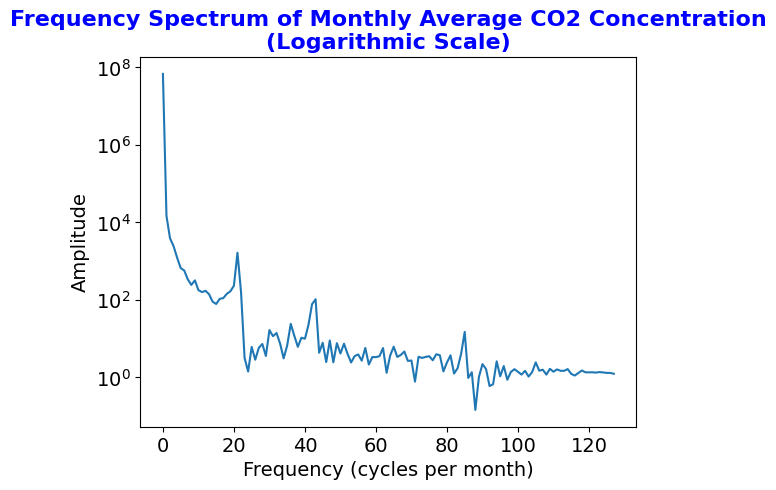

In [29]:
plt.plot(np.abs(X[:int(len(X)/2)])**2/int(len(X)/2))
plt.yscale("log")
#plt.xlim(0,50)

# Add axis labels
plt.xlabel('Frequency (cycles per month)')
plt.ylabel('Amplitude')

plt.title('Frequency Spectrum of Monthly Average CO2 Concentration\n(Logarithmic Scale)', fontsize=16, fontweight='bold', color='blue')

plt.show()

In [33]:
Heavyside = np.append(np.zeros_like(X[:50]), np.ones_like(X[50:]))

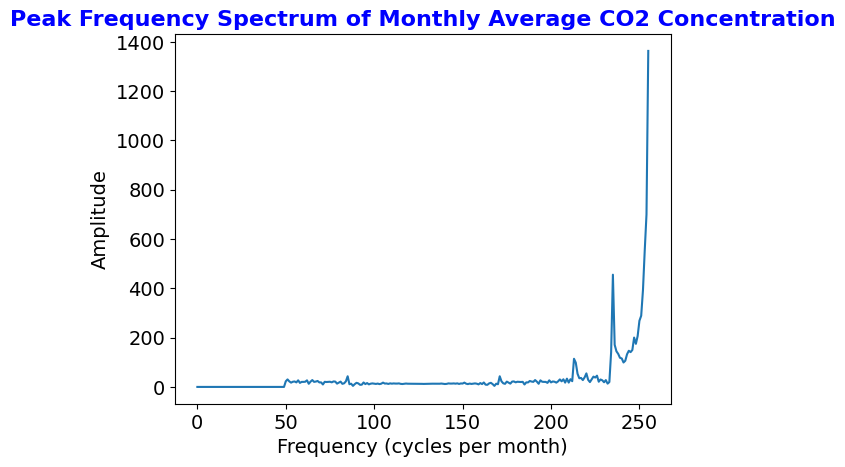

In [36]:
plt.plot(Heavyside*np.abs(X))
# Add axis labels
plt.xlabel('Frequency (cycles per month)')
plt.ylabel('Amplitude')

plt.title('Peak Frequency Spectrum of Monthly Average CO2 Concentration', fontsize=16, fontweight='bold', color='blue')

plt.show()

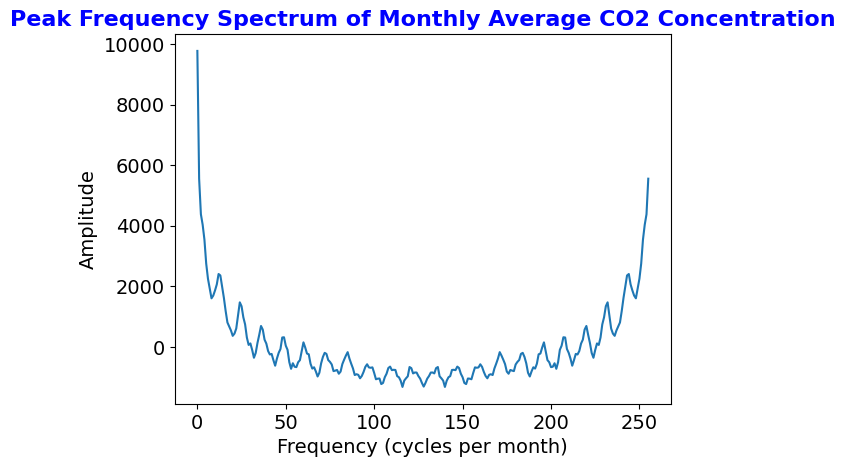

In [39]:
plt.plot(fft(Heavyside[:256]*np.abs(X[:256])))
plt.xlabel('Frequency (cycles per month)')
plt.ylabel('Amplitude')

plt.title('Peak Frequency Spectrum of Monthly Average CO2 Concentration', fontsize=16, fontweight='bold', color='blue')

plt.show()
